In [3]:
import pandas as pd
import numpy as np
import pyspark as ps
import pyspark.sql.functions
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
nba_df = pd.read_csv('/home/blair/cognixia/AdvancedPhase/DataLake_and_DataWarehouse/blair/nba_cleaned.csv')
nba_df.head().style.set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'blue')]}])

,display_first_last,birthdate,school,country,height,weight,season_exp,jersey,position,rosterstatus,team_name,draft_year,draft_round,draft_number,greatest_75_flag
0,Mahmoud Abdul-Rauf,1969-03-09 00:00:00,Louisiana State,USA,6-1,162.000000,9.000000,1,Guard,Inactive,Nuggets,1990,1,3,N
1,Tariq Abdul-Wahad,1974-11-03 00:00:00,San Jose State,France,6-6,235.000000,7.000000,9,Forward-Guard,Inactive,Kings,1997,1,11,N
2,Jordan Adams,1994-07-08 00:00:00,UCLA,USA,6-5,209.000000,3.000000,3,Guard,Inactive,Grizzlies,2014,1,22,N
3,Rafael Addison,1964-07-22 00:00:00,Syracuse,USA,6-8,241.000000,6.000000,7,Forward,Inactive,Nets,1986,2,39,N
4,Blake Ahearn,1984-05-27 00:00:00,Missouri State,USA,6-2,190.000000,4.000000,2,Guard,Inactive,Heat,Undrafted,Undrafted,Undrafted,N


In [5]:
nba_greatest_75 = nba_df.loc[nba_df['greatest_75_flag'].eq('Y')]
# nba_greatest_75.groupby(['team_name']).describe()
nba_greatest_75_by_team = nba_greatest_75['team_name']
# nba_greatest_75_by_team = pd.DataFrame(nba_greatest_75_by_team)
nba_greatest_75_by_team.describe()

count         36
unique        20
top       Lakers
freq           8
Name: team_name, dtype: object

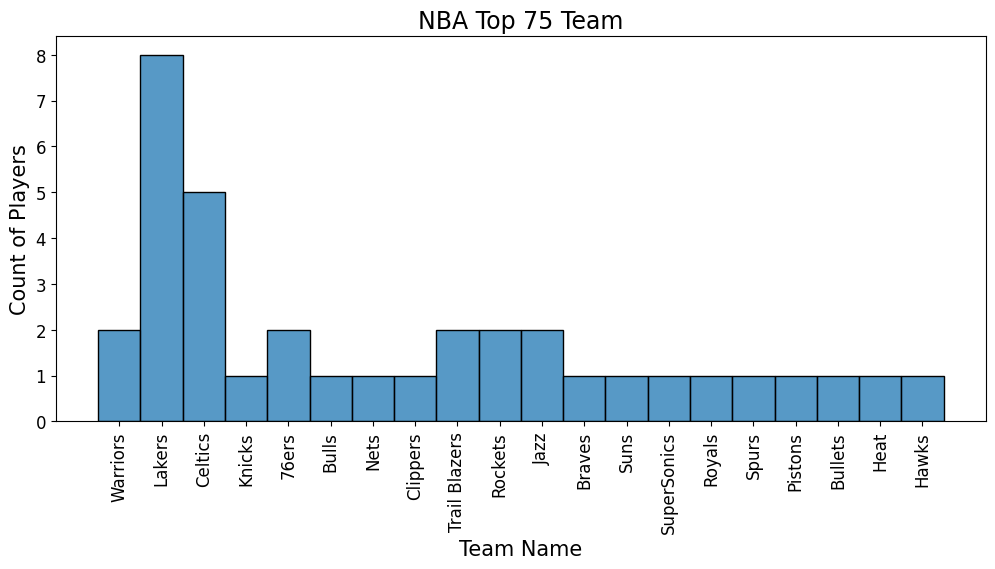

In [6]:
ax = sns.histplot(data=nba_greatest_75_by_team)
ax.figure.set_size_inches(12, 5)
plt.title('NBA Top 75 Team', size=17)
plt.xlabel('Team Name', size=15)
plt.ylabel('Count of Players', size=15)
plt.xticks(rotation=90, size=12)
plt.yticks(size=12)
plt.show()

In [7]:
warriors = nba_df[nba_df['team_name'].isin(['Warriors'])]
drafted_warriors = warriors.loc[warriors['draft_year'].ne('Undrafted')]
most_current_warriors = drafted_warriors.loc[drafted_warriors['draft_year'].ge('2005')]

drafted_warriors
most_current_warriors.head().style.set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'blue')]}])

,display_first_last,birthdate,school,country,height,weight,season_exp,jersey,position,rosterstatus,team_name,draft_year,draft_round,draft_number,greatest_75_flag
68,Nemanja Bjelica,1988-05-09 00:00:00,Fenerbahce,Serbia,6-9,234.000000,8.000000,8,Forward,Inactive,Warriors,2010,2,35,N
541,Charles Jenkins,1989-02-28 00:00:00,Hofstra,USA,6-3,215.000000,3.000000,31,Guard,Inactive,Warriors,2011,2,44,N
548,Ty Jerome,1997-07-08 00:00:00,Virginia,USA,6-5,195.000000,3.000000,10,Guard-Forward,Active,Warriors,2019,1,24,N
698,Jonathan Kuminga,2002-10-06 00:00:00,NBA G League Ignite,DRC,6-7,225.000000,1.000000,00,Forward,Active,Warriors,2021,1,7,N
779,Kevon Looney,1996-02-06 00:00:00,UCLA,USA,6-9,222.000000,7.000000,5,Forward,Active,Warriors,2015,1,30,N


In [8]:
kings = nba_df[nba_df['team_name'].isin(['Kings'])]
drafted_kings = kings.loc[kings['draft_year'].ne('Undrafted')]
most_current_kings = drafted_kings.loc[drafted_kings['draft_year'].ge('2005')]

most_current_kings.head().style.set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'blue')]}])

,display_first_last,birthdate,school,country,height,weight,season_exp,jersey,position,rosterstatus,team_name,draft_year,draft_round,draft_number,greatest_75_flag
271,De'Aaron Fox,1997-12-20 00:00:00,Kentucky,USA,6-3,185.000000,5.000000,5,Guard,Active,Kings,2017,1,5,N
362,Donte Greene,1988-02-21 00:00:00,Syracuse,USA,6-11,226.000000,6.000000,13,Forward,Inactive,Kings,2008,1,28,N
403,Maurice Harkless,1993-05-11 00:00:00,"St. John's, N.Y.",USA,6-7,220.000000,11.000000,8,Forward-Guard,Inactive,Kings,2012,1,15,N
499,Kevin Huerter,1998-08-27 00:00:00,Maryland,USA,6-7,198.000000,4.000000,9,Guard-Forward,Active,Kings,2018,1,19,N
531,Justin James,1997-01-24 00:00:00,Wyoming,USA,6-7,190.000000,3.000000,10,Guard-Forward,Inactive,Kings,2019,2,40,N


In [9]:
young_warriors = most_current_warriors.loc[most_current_warriors['draft_year'].ge('2018')].count()
young_kings = most_current_kings.loc[most_current_kings['draft_year'].ge('2018')].count()

warriors_young_players = young_warriors['display_first_last']
kings_young_players = young_kings['display_first_last']

young_players = [warriors_young_players, kings_young_players]
young_players

warriors = most_current_warriors.loc[most_current_warriors['draft_year'].ge('2018')]
kings = most_current_kings.loc[most_current_kings['draft_year'].ge('2018')]

warriors_team = warriors['team_name']
kings_team = kings['team_name']
players_team = pd.concat([warriors_team, kings_team]).unique()
players_team

array(['Warriors', 'Kings'], dtype=object)

(0.0, 10.0)

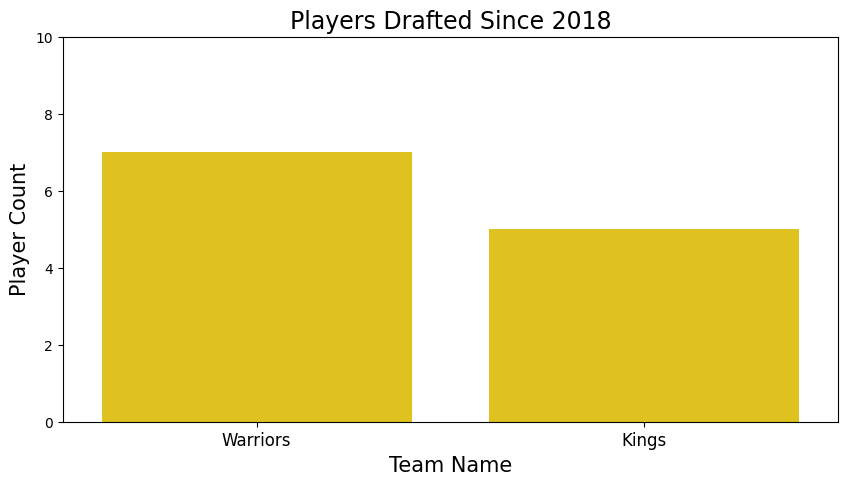

In [10]:
# sns.boxplot(young_players)
# sns.barplot(x=['Warriors', 'Kings'], y=young_players)
ax = sns.barplot(x=['Warriors', 'Kings'], y=young_players, color='gold')
ax.figure.set_size_inches(10, 5)
plt.title('Players Drafted Since 2018', size=17)
plt.xlabel('Team Name', size=15)
plt.ylabel('Player Count', size=15)
plt.xticks(size=12)
plt.ylim(0, 10)

In [11]:
undrafted_players = nba_df.loc[(nba_df['draft_year'].eq('Undrafted')) & (nba_df['country'].ne('USA'))]
drafted_players = nba_df.loc[(nba_df['draft_year'].ne('Undrafted')) & (nba_df['country'].ne('USA'))]
drafted_undrafted = pd.concat([undrafted_players, drafted_players]).count()
pd.concat([undrafted_players.head(3), drafted_players.head(3)]).style.set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', 'blue')]}])

,display_first_last,birthdate,school,country,height,weight,season_exp,jersey,position,rosterstatus,team_name,draft_year,draft_round,draft_number,greatest_75_flag
11,Kyle Alexander,1996-10-21 00:00:00,Tennessee,Canada,6-10,216.000000,2.000000,17,Forward-Center,Inactive,Heat,Undrafted,Undrafted,Undrafted,N
26,Joel Anthony,1982-08-09 00:00:00,UNLV,Canada,6-9,245.000000,11.000000,30,Center,Inactive,Heat,Undrafted,Undrafted,Undrafted,N
27,Pero Antic,1982-07-29 00:00:00,Olympiacos,Macedonia,6-11,260.000000,2.000000,6,Forward-Center,Inactive,Hawks,Undrafted,Undrafted,Undrafted,N
1,Tariq Abdul-Wahad,1974-11-03 00:00:00,San Jose State,France,6-6,235.000000,7.000000,9,Forward-Guard,Inactive,Kings,1997,1,11,N
5,Solomon Alabi,1988-03-21 00:00:00,Florida State,Nigeria,7-1,252.000000,3.000000,50,Center,Inactive,Raptors,2010,2,50,N
7,Furkan Aldemir,1991-08-09 00:00:00,Galatasaray,Turkey,6-10,240.000000,2.000000,19,Forward-Center,Inactive,76ers,2012,2,53,N


/tmp/ipykernel_29373/3910003285.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(drafted_undrafted['draft_year'], loc='lower right', fontsize='13', labels=['Undrafted (45 Total)', 'Drafted (129 Total)'])


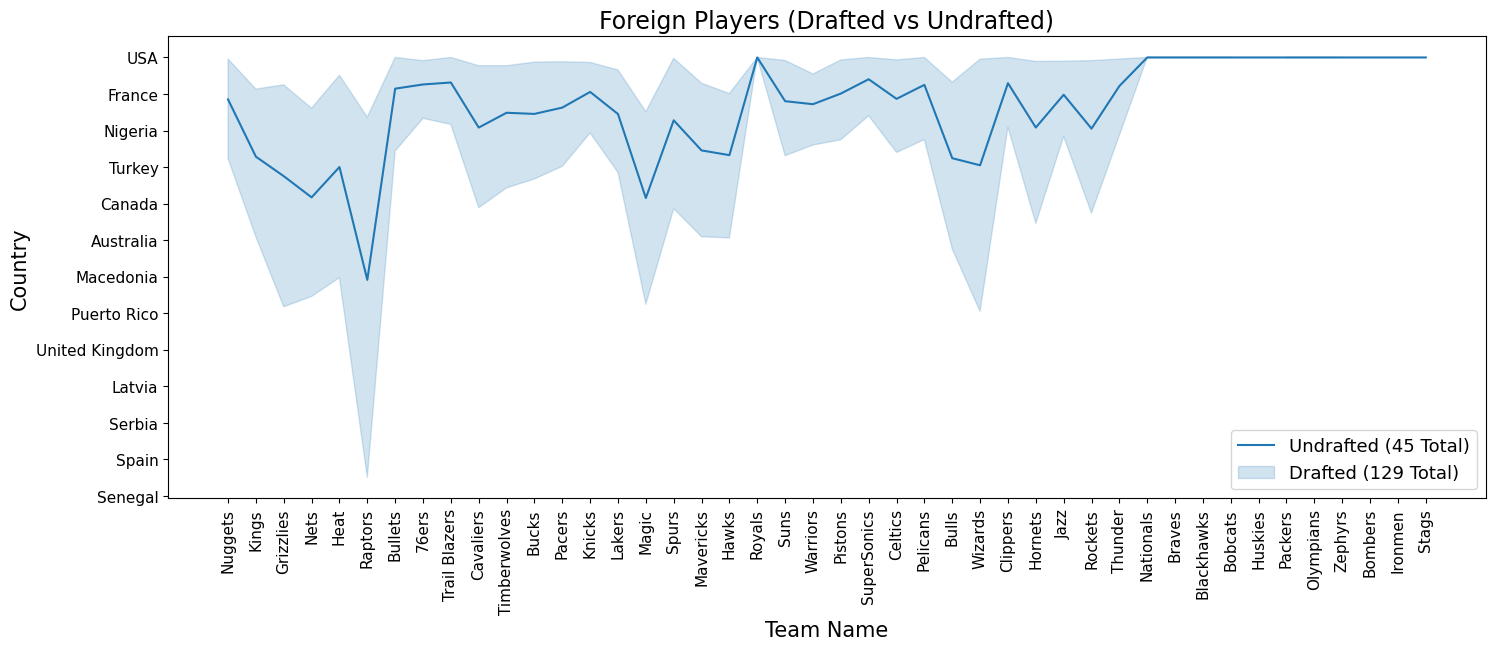

In [12]:
ax = sns.lineplot(drafted_undrafted, x=nba_df['team_name'], y=nba_df['country'])
ax.figure.set_size_inches(17, 6)
plt.title('Foreign Players (Drafted vs Undrafted)', size=17)
plt.legend(drafted_undrafted['draft_year'], loc='lower right', fontsize='13', labels=['Undrafted (45 Total)', 'Drafted (129 Total)'])
plt.xticks(rotation=90, size=11)
plt.yticks(rotation=0, size=11)
plt.xlabel('Team Name', size=15)
plt.ylabel('Country', size=15)
plt.show()